In [1]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.arima.model import ARIMA

from tqdm import tqdm
from math import sqrt
import warnings
warnings.simplefilter('ignore')

In [2]:
def evaluate_arima_model(train,test, arima_order, metric="rmse"):
    
    history = [x for x in train]
    predictions = list()
    for t in tqdm(range(len(test))):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    if metric == "rmse":return sqrt(mean_squared_error(test, predictions)), predictions
        
    elif metric == "mae":return mean_absolute_error(test, predictions), predictions




In [3]:
def gridSearch_models(trainset,testset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse,predictions = evaluate_arima_model(trainset,testset order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2331389836.py, line 9)

In [4]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

NameError: name 'evaluate_models' is not defined

In [5]:
def main():
    
    humidity = pd.read_csv("/home/dah/deep_learning_isima/tp_reseaux recurrents/datasets/humidity.csv")
    
    ville='Montreal'
    humidity_M = humidity[['datetime',ville]]

    humidity_M.interpolate(inplace=True)
    humidity_M.dropna(inplace=True)
    nb_samples = int(len(humidity_M)*0.90)
    
    humidity_train = np.array(humidity_M[ville][:nb_samples]).ravel()
    humidity_test = np.array(humidity_M[ville][nb_samples:]).ravel()
    
    
    arima_order=(5,1,0)
    rmse,predictions=evaluate_arima_model(humidity_train,humidity_test, arima_order, metric="rmse")
    # rmse = sqrt(mean_squared_error(humidity_test[0:len(humidity_test)//10], predictions))
    print('Test MSE: %.3f' % rmse)
    plt.plot(humidity_test,label="Actual")
    plt.plot(predictions,label="Predicted")
    plt.legend()
    plt.show()

    # mae = mean_absolute_error(humidity_test[0:len(humidity_test)//10], predictions)
    # print('Test MAE: %.3f' % mae)
    # train_predictions = model_fit.predict(start=train_start_dt, end=test_start_dt)
    # test_predictions = model_fit.predict(start=test_start_dt, end=test.index[-1])
    # #plt.plot(humidity_test)
    # out,targets=model.predict(test_loader)
    

    # plt.figure(figsize=(22, 4))
    # plt.plot(out,label="Predicted")
    # plt.plot(targets,label="Actual")
    # plt.legend()
    # plt.show()

    # model.evaluation(out,targets,"mse")
    # model.evaluation(out,targets,"mae")
    



100%|██████████████████████████| 4526/4526 [1:27:36<00:00,  1.16s/it]

Test MSE: 6.999


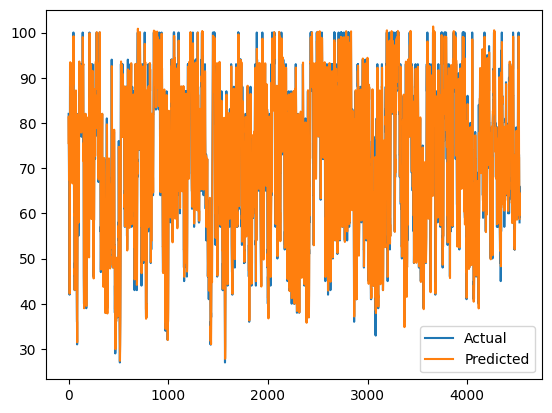

In [6]:
if __name__=="__main__":
    main()